In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [3]:
nordeste_path = '../data/parquet/regiao/NORDESTE.parquet'

df = pd.read_parquet(nordeste_path)

In [4]:
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
360525,RCBP SALVADOR,MASCULINO,None,84.0,SEM INFORMAÇÃO,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,None,None,26/03/1996,None,NORDESTE
360526,RCBP SALVADOR,FEMININO,None,49.0,PARDA,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,None,None,05/05/1996,None,NORDESTE
360527,RCBP SALVADOR,FEMININO,14/10/1956,39.0,PARDA,Não informado,Não informado,None,SEM INFORMAÇÃO,CASADO,...,None,nan,nan,None,CÂNCER,15/02/1998,None,15/02/1996,None,NORDESTE
360528,RCBP SALVADOR,FEMININO,None,30.0,PARDA,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,None,None,27/03/1996,None,NORDESTE
360529,RCBP SALVADOR,MASCULINO,None,61.0,PRETA,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,None,None,27/09/1996,None,NORDESTE


In [5]:
df.shape

(392805, 37)

In [6]:
df.columns

Index(['Nome do RCBP', 'Sexo', 'Data de Nascimento', 'Idade', 'Raca/Cor',
       'Nacionalidade', 'Naturalidade Estado', 'Naturalidade',
       'Grau de Instrução', 'Estado Civil', 'Código Profissão',
       'Nome Profissão', 'Estado Endereço', 'Cidade Endereço',
       'Descrição da Topografia', 'Código da Topografia',
       'Descrição da Morfologia', 'Código da Morfologia',
       'Descrição da Doenca', 'Código da Doenca',
       'Descrição da Doenca Infantil', 'Código da Doenca Infantil',
       'Descrição da Doenca Adulto Jovem', 'Código da Doenca Adulto Jovem',
       'Indicador de Caso Raro', 'Meio de Diagnostico', 'Extensão',
       'Lateralidade', 'Estadiamento', 'TNM', 'Status Vital', 'Tipo do Obito',
       'Data do Óbito', 'Data de Último Contato', 'Data de Diagnostico',
       'Metástase à distância', 'Regiao'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392805 entries, 360525 to 2247465
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Nome do RCBP                      392805 non-null  object 
 1   Sexo                              392805 non-null  object 
 2   Data de Nascimento                373804 non-null  object 
 3   Idade                             387861 non-null  float64
 4   Raca/Cor                          392805 non-null  object 
 5   Nacionalidade                     384068 non-null  object 
 6   Naturalidade Estado               385569 non-null  object 
 7   Naturalidade                      148715 non-null  object 
 8   Grau de Instrução                 383394 non-null  object 
 9   Estado Civil                      382988 non-null  object 
 10  Código Profissão                  338391 non-null  float64
 11  Nome Profissão                    338391 non-null  

In [8]:
df['Data de Diagnostico'].count()

392805

In [9]:
df['Data de Diagnostico'] = pd.to_datetime(df['Data de Diagnostico'], format='%d/%m/%Y')

In [10]:
df['Data de Diagnostico'].count()

392805

In [11]:
df = df.sort_values(by='Data de Diagnostico')

In [12]:
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
787141,RCBP FORTALEZA,FEMININO,04/08/1939,50.0,BRANCO,BRASIL,Não informado,None,SEM INFORMAÇÃO,CASADO,...,None,nan,nan,None,None,None,None,1990-01-01,None,NORDESTE
786037,RCBP FORTALEZA,FEMININO,04/02/1944,45.0,PARDA,BRASIL,Não informado,None,SEM INFORMAÇÃO,VIÚVO,...,None,nan,nan,None,CÂNCER,01/01/1990,None,1990-01-01,None,NORDESTE
787085,RCBP FORTALEZA,FEMININO,29/01/1930,59.0,PARDA,Não informado,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,None,None,None,1990-01-01,None,NORDESTE
788324,RCBP FORTALEZA,FEMININO,02/08/1937,52.0,PARDA,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,None,nan,nan,None,NÃO CÂNCER,27/03/2008,None,1990-01-02,None,NORDESTE
786034,RCBP FORTALEZA,FEMININO,14/04/1941,48.0,PARDA,BRASIL,Não informado,None,SEM INFORMAÇÃO,CASADO,...,None,nan,nan,None,None,None,None,1990-01-02,None,NORDESTE


In [13]:
df.tail()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância,Regiao
1873756,RCBP RECIFE,FEMININO,30/07/1961,57.0,PARDA,BRASIL,Não informado,Não Informado,FUNDAMENTAL I (1ª A 4ª SÉRIE),CASADO,...,None,nan,nan,None,CÂNCER,30/12/2018,None,2018-12-30,None,NORDESTE
1871844,RCBP RECIFE,FEMININO,12/10/1932,86.0,BRANCO,BRASIL,Não informado,None,SUPERIOR COMPLETO,VIÚVO,...,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999.0,MORTO,CÂNCER,30/12/2018,30/12/2018,2018-12-30,None,NORDESTE
1873119,RCBP RECIFE,FEMININO,13/05/1942,76.0,BRANCO,BRASIL,Não informado,Não Informado,SEM INFORMAÇÃO,VIÚVO,...,None,nan,nan,None,None,None,None,2018-12-31,None,NORDESTE
1870633,RCBP RECIFE,FEMININO,14/12/1923,95.0,BRANCO,BRASIL,Não informado,None,SUPERIOR COMPLETO,VIÚVO,...,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999.0,MORTO,NÃO CÂNCER,31/12/2018,31/12/2018,2018-12-31,None,NORDESTE
1874426,RCBP RECIFE,FEMININO,03/01/1935,83.0,PRETA,BRASIL,Não informado,None,SEM INFORMAÇÃO,CASADO,...,SEM INFORMAÇÃO,99 - SEM INFORMAÇÃO,999.0,MORTO,CÂNCER,31/12/2018,31/12/2018,2018-12-31,None,NORDESTE


In [14]:
print(df['Data de Diagnostico'].min())
print(df['Data de Diagnostico'].max())

1990-01-01 00:00:00
2018-12-31 00:00:00


In [15]:
datas = pd.date_range(start='1990-01-01', end='2018-12-31', freq='ME')

In [16]:
print(len(datas))

348


In [17]:
n_unique_months = df['Data de Diagnostico'].dt.to_period('M').nunique()

print(n_unique_months)

348


# Verificação Temporal por Doença

In [18]:
df_mama = df[df['Descrição da Doenca'].isin(['MAMA , SOE', 'QUADRANTE SUPERIOR EXTERNO DA MAMA', 'PROLONGAMENTO AXILAR DA MAMA',
                                            'QUADRANTE SUPERIOR INTERNO DA MAMA', 'CARCINOMA "IN SITU" DA MAMA, SOE',
                                            'PORCAO CENTRAL DA MAMA', 'QUADRANTE INFERIOR EXTERNO DA MAMA',
                                            'LESAO INVASIVA DA MAMA', 'QUADRANTE INFERIOR INTERNO DA MAMA', 'MAMA'])]

df_prostata = df[df['Descrição da Doenca'] == 'PROSTATA']

df_colo_utero = df[df['Descrição da Doenca'].isin(['COLO DO UTERO, SOE', 'OUTRAS PARTES DO COLO DO UTERO',
                                                  'LESAO INVASIVA DO COLO DO UTERO', 'COLO DO UTERO',
                                                  'CARCINOMA "IN SITU" DO COLO DO UTERO (CERVIX)'])]

df_pele = df[df['Descrição da Doenca'].isin(['PELE DE OUTRAS PARTES DA FACE, SOE', 'PELE DE OUTRAS PARTES DA FACE',
                                            'PELE DO MEMBRO INFERIOR E DO QUADRIL','PELE DA PALPEBRA E CANTO',
                                            'PELE DO TRONCO','NEOPLASIA MALIGNA DA PELE','PELE DO COURO CABELUDO E DO PESCOCO',
                                            'PELE DA ORELHA E CONDUTO AUDITIVO EXTERNO','PELE DO MEMBRO SUPERIOR E DO OMBRO',
                                            'PELE DOS MEMBROS SUPERIORES, INCLUINDO OMBRO','PELE DO LABIO',
                                            'PELE DA ORELHA E DO CONDUTO AUDITIVO EXTERNO','SARCOMA DE KAPOSI DA PELE',
                                            'PELE DA PALPEBRA, INCLUINDO CANTO','PELE DOS MEMBROS INFERIORES, INCLUINDO QUADRIL',
                                            'MELANOMA MALIGNO DA PELE, SOE','PELE, SOE','LESAO INVASIVA DA PELE',
                                            'MELANOMA MALIGNO INVASIVO DA PELE','PELE DE OUTRAS LOCALIZACOES',
                                            'OUTRAS NEOPLASIAS MALIGNAS DA PELE'])]

df_pulmao = df[df['Descrição da Doenca'].isin(['BRONQUIOS OU PULMOES, SOE', 'BRONQUIOS E PULMOES',
                                              'LESAO INVASIVA DOS BRONQUIOS E DOS PULMOES'])]

In [19]:
df_mama = df_mama.sort_values(by='Data de Diagnostico')
df_prostata = df_prostata.sort_values(by='Data de Diagnostico')
df_colo_utero = df_colo_utero.sort_values(by='Data de Diagnostico')
df_pele = df_pele.sort_values(by='Data de Diagnostico')
df_pulmao = df_pulmao.sort_values(by='Data de Diagnostico')

In [20]:
df_mama = df_mama.set_index('Data de Diagnostico')
df_prostata = df_prostata.set_index('Data de Diagnostico')
df_colo_utero = df_colo_utero.set_index('Data de Diagnostico')
df_pele = df_pele.set_index('Data de Diagnostico')
df_pulmao = df_pulmao.set_index('Data de Diagnostico')

In [21]:
result_mama = df_mama.resample("ME")['Nome do RCBP'].count()
result_prostata = df_prostata.resample("ME")['Nome do RCBP'].count()
result_colo_utero = df_colo_utero.resample("ME")['Nome do RCBP'].count()
result_pele = df_pele.resample("ME")['Nome do RCBP'].count()
result_pulmao = df_pulmao.resample("ME")['Nome do RCBP'].count()

#### Mama

<Axes: xlabel='Data de Diagnostico'>

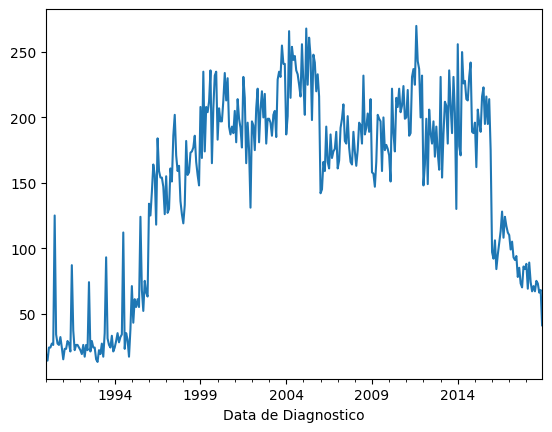

In [22]:
result_mama.plot()

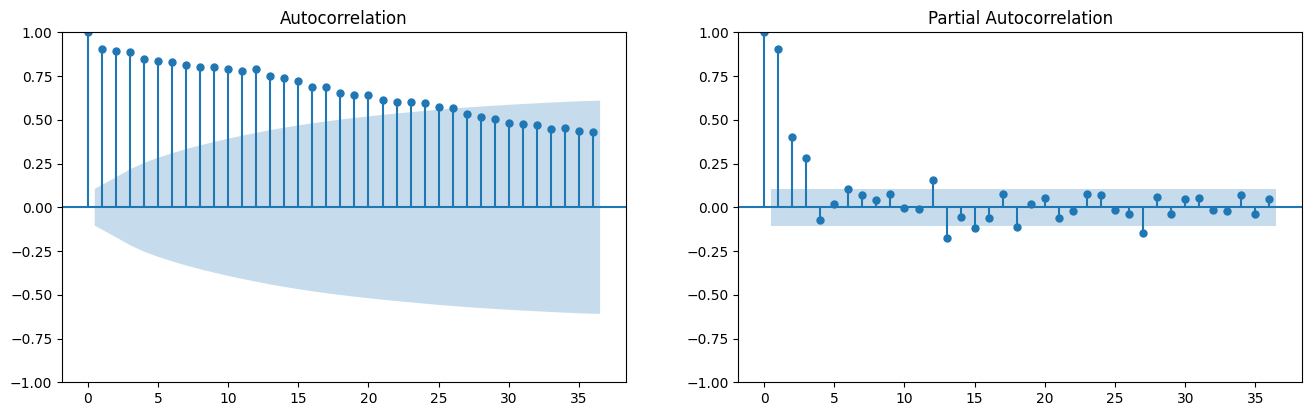

In [23]:
acf_pacf(result_mama.values, 36)

#### Prostata

<Axes: xlabel='Data de Diagnostico'>

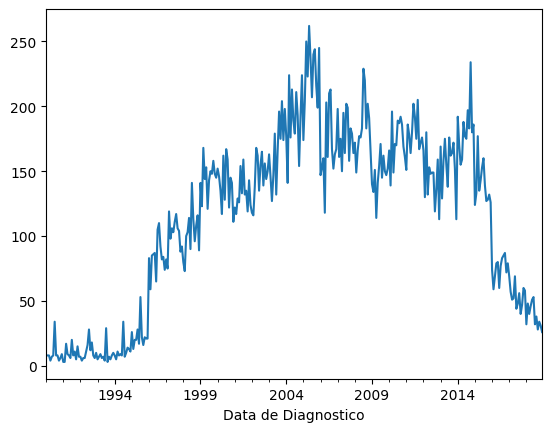

In [24]:
result_prostata.plot()

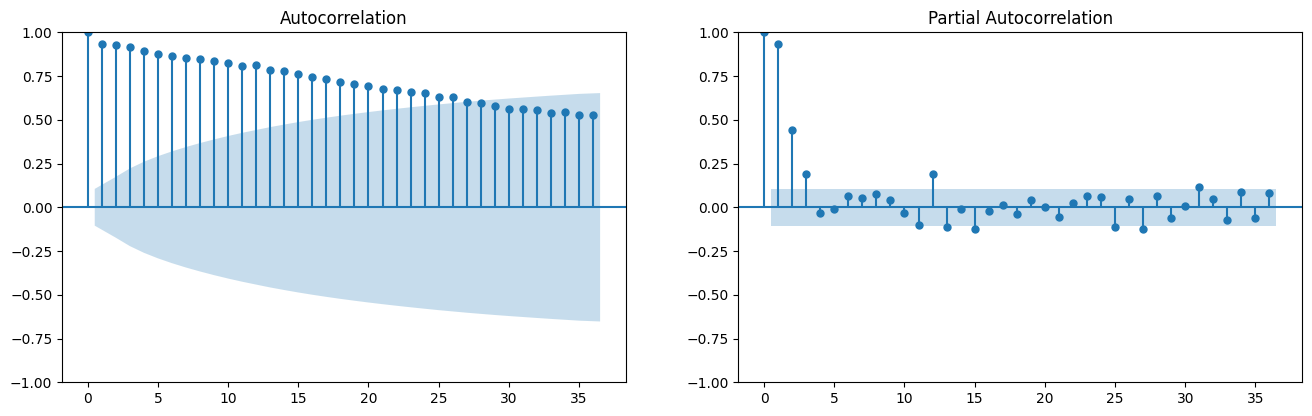

In [25]:
acf_pacf(result_prostata.values, 36)

#### Utero

<Axes: xlabel='Data de Diagnostico'>

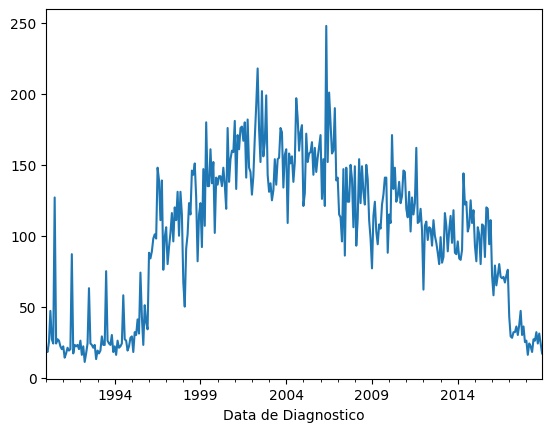

In [26]:
result_colo_utero.plot()

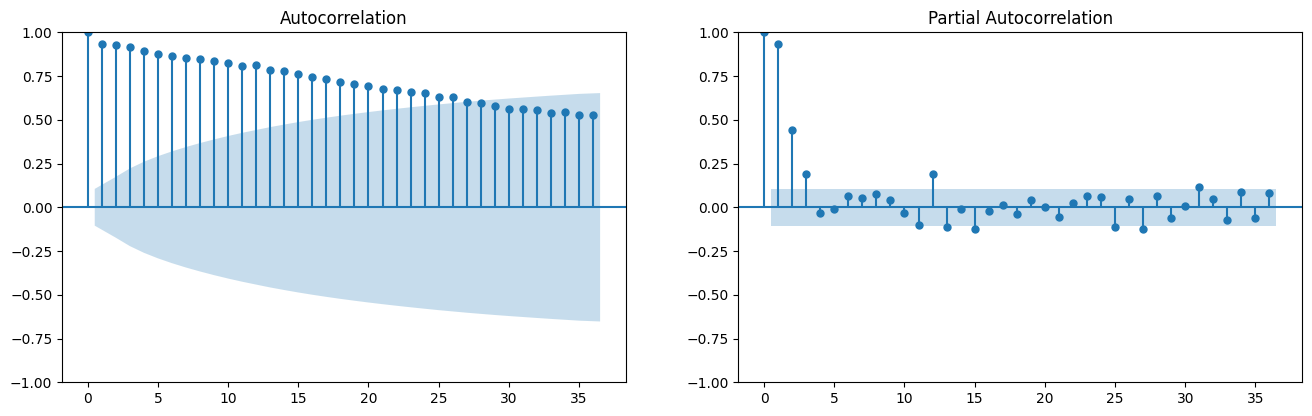

In [27]:
acf_pacf(result_prostata.values, 36)

#### Pele

<Axes: xlabel='Data de Diagnostico'>

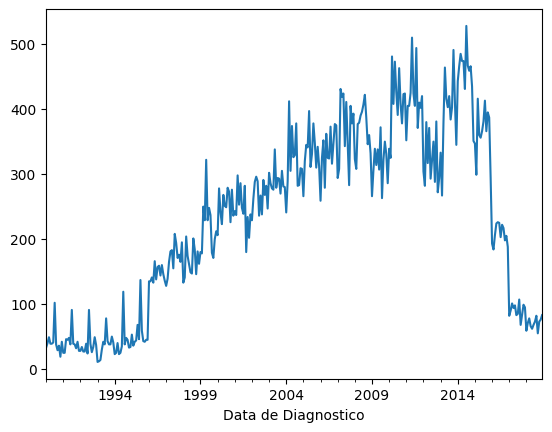

In [28]:
result_pele.plot()

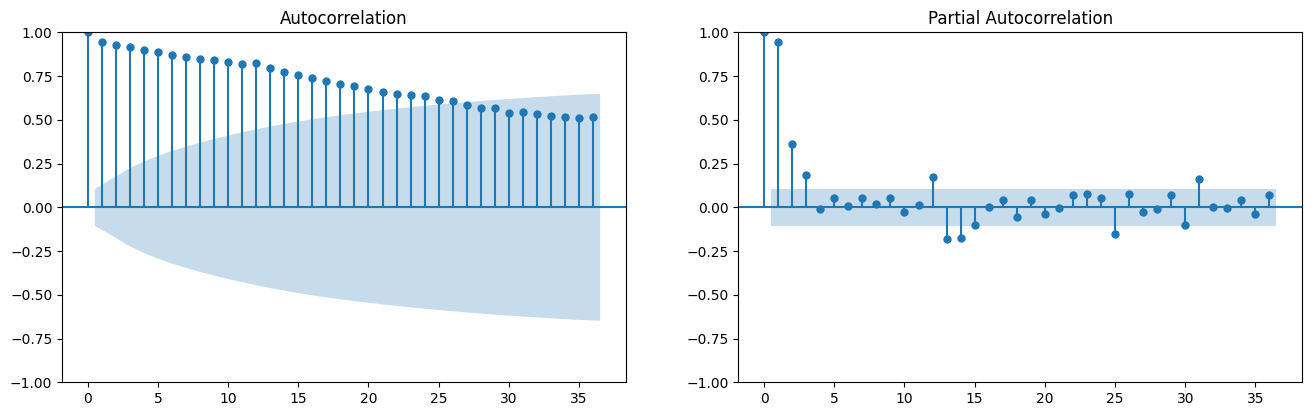

In [29]:
acf_pacf(result_pele.values, 36)

#### Pulmao

<Axes: xlabel='Data de Diagnostico'>

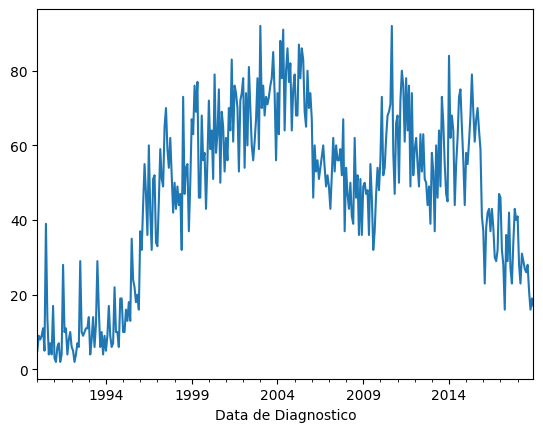

In [30]:
result_pulmao.plot()

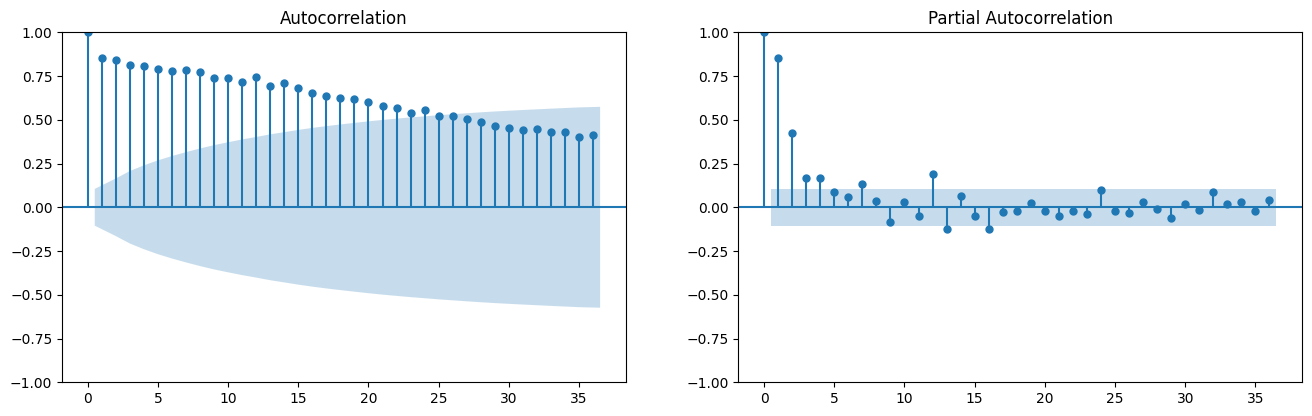

In [31]:
acf_pacf(result_pulmao.values, 36)